In [16]:
from pylab import plot, semilogy
from numpy import loadtxt, pi, linspace
D = loadtxt("conv.txt")
N = D[:, 0]
DOFs = N**3
E = D[:, 1]
E_exact = D[-1, 1]

calc = abs(E-E_exact)
k = 2.8
A = calc[0] / exp(-k*DOFs[0]**(1./3))
print "E_exact = %.17f" % E_exact
print "A =", A
pred_x = linspace(DOFs[0], DOFs[6], 500)
pred_y = A * exp(-k*pred_x**(1./3))

D1 = loadtxt("conv_fe1.txt")
DOFs_fe1 = D1[:, 1]
E_fe1 = D1[:, 2]

D2 = loadtxt("conv_fe2.txt")
DOFs_fe2 = D2[:, 1]
E_fe2 = D2[:, 2]

D3 = loadtxt("conv_fe3.txt")
DOFs_fe3 = D3[:, 1]
E_fe3 = D3[:, 2]

E_exact = 1.41399174842279707
A = 740.144278824


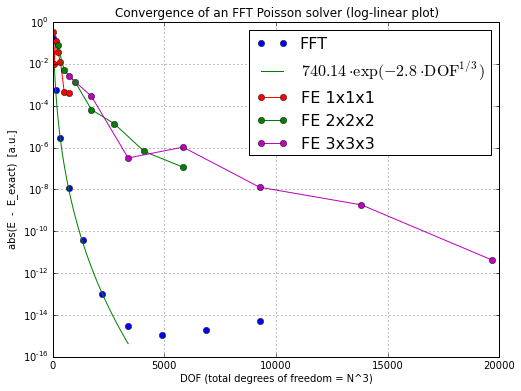

In [19]:
figure(figsize=(8, 6), dpi=80)
semilogy(DOFs[:10], calc[:10], "bo", label="FFT")
semilogy(pred_x, pred_y, "g-", label=r"$740.14\cdot\exp(-2.8\cdot \mathrm{DOF}^{1/3})$")
semilogy(DOFs_fe1, abs(E_fe1 - E_exact), "ro-", label="FE 1x1x1")
semilogy(DOFs_fe2, abs(E_fe2 - E_exact), "go-", label="FE 2x2x2")
semilogy(DOFs_fe3, abs(E_fe3 - E_exact), "mo-", label="FE 3x3x3")
grid()
title("Convergence of an FFT Poisson solver (log-linear plot)")
xlabel("DOF (total degrees of freedom = N^3)")
ylabel("abs(E  -  E_exact)  [a.u.]")
legend(prop={"size": 16})
savefig("fft_convergence_log-linear.png")

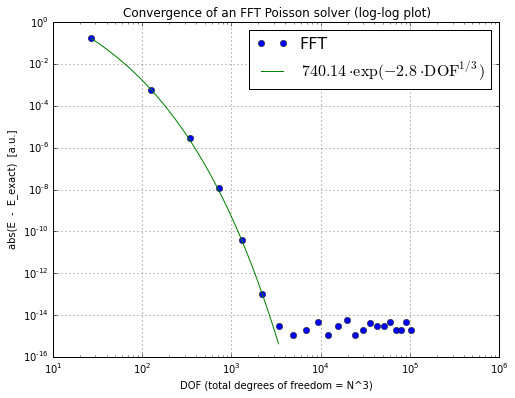

In [3]:
figure(figsize=(8, 6), dpi=80)
loglog(DOFs, calc, "bo", label="FFT") 
loglog(pred_x, pred_y, "g-", label=r"$740.14\cdot\exp(-2.8\cdot \mathrm{DOF}^{1/3})$")
grid()
title("Convergence of an FFT Poisson solver (log-log plot)")
xlabel("DOF (total degrees of freedom = N^3)")
ylabel("abs(E  -  E_exact)  [a.u.]")
legend(prop={"size": 16})
savefig("fft_convergence_log-log.png")